# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Brandon 

#### Github Repo Link: https://github.com/brandonjbbb/NovemberWebScrape

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [2]:
import requests
import pickle

# URL of the article
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# Fetch the HTML content
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    html_content = response.text
    print("HTML content fetched successfully!")
else:
    raise Exception(f"Failed to fetch URL. Status Code: {response.status_code}")

# Save the HTML content to a .pkl file
with open("article.pkl", "wb") as file:
    pickle.dump(html_content, file)
    print("HTML content saved to 'article.pkl'.")


HTML content fetched successfully!
HTML content saved to 'article.pkl'.


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [3]:
import pickle
from bs4 import BeautifulSoup

# Load the HTML content from the .pkl file
with open("article.pkl", "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Extract and print the text content of the article
article_text = soup.get_text()
print(article_text)


















How Laser Headlights Work | Hackaday






































































Skip to content






Hackaday


Primary Menu

Home
Blog
Hackaday.io
Tindie
Hackaday Prize
Submit
About


Search for:



 March 27, 2021 






How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype 

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [5]:
import spacy
from collections import Counter

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Process the article text with spaCy
doc = nlp(article_text)

# Filter out stopwords, punctuation, and whitespace, and convert tokens to lowercase
filtered_tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

# Count the frequency of tokens
token_freq = Counter(filtered_tokens)

# Get the 5 most frequent tokens
most_common_tokens = token_freq.most_common(5)

# Print the results
print("Top 5 Tokens and Their Frequencies:")
for token, freq in most_common_tokens:
    print(f"Token: {token}, Frequency: {freq}")


Top 5 Tokens and Their Frequencies:
Token: comment, Frequency: 136
Token: march, Frequency: 133
Token: 2021, Frequency: 133
Token: says, Frequency: 132
Token: report, Frequency: 130


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [6]:
import spacy
from collections import Counter

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Process the article text with spaCy
doc = nlp(article_text)

# Filter out stopwords, punctuation, and whitespace, and extract lemmas converted to lowercase
filtered_lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

# Count the frequency of lemmas
lemma_freq = Counter(filtered_lemmas)

# Get the 5 most frequent lemmas
most_common_lemmas = lemma_freq.most_common(5)

# Print the results
print("Top 5 Lemmas and Their Frequencies:")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: {lemma}, Frequency: {freq}")


Top 5 Lemmas and Their Frequencies:
Lemma: comment, Frequency: 157
Lemma: say, Frequency: 134
Lemma: march, Frequency: 133
Lemma: 2021, Frequency: 133
Lemma: report, Frequency: 130


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [7]:
import spacy
from collections import Counter

# Define the methods
def score_sentence_by_token(sentence, interesting_tokens):
    """
    Scores a sentence based on the frequency of interesting tokens.

    Parameters:
        sentence (str): The sentence to be scored.
        interesting_tokens (list): A list of interesting tokens.

    Returns:
        float: The ratio of interesting tokens to the total number of tokens in the sentence.
    """
    # Process the sentence with spaCy
    doc = nlp(sentence)
    
    # Tokenize and filter out punctuation and whitespace
    sentence_tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_space]
    
    # Count how many interesting tokens are in the sentence
    interesting_count = sum(1 for token in sentence_tokens if token in interesting_tokens)
    
    # Calculate the score
    return interesting_count / len(sentence_tokens) if len(sentence_tokens) > 0 else 0


def score_sentence_by_lemma(sentence, interesting_lemmas):
    """
    Scores a sentence based on the frequency of interesting lemmas.

    Parameters:
        sentence (str): The sentence to be scored.
        interesting_lemmas (list): A list of interesting lemmas.

    Returns:
        float: The ratio of interesting lemmas to the total number of words in the sentence.
    """
    # Process the sentence with spaCy
    doc = nlp(sentence)
    
    # Tokenize and extract lemmas while filtering out punctuation and whitespace
    sentence_lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space]
    
    # Count how many interesting lemmas are in the sentence
    interesting_count = sum(1 for lemma in sentence_lemmas if lemma in interesting_lemmas)
    
    # Calculate the score
    return interesting_count / len(sentence_lemmas) if len(sentence_lemmas) > 0 else 0


# Test the methods using the first sentence
# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Process the article text
doc = nlp(article_text)

# Extract the first sentence
first_sentence = list(doc.sents)[0].text

# Use frequent tokens and lemmas identified in Question 3
frequent_tokens = [token for token, freq in most_common_tokens]
frequent_lemmas = [lemma for lemma, freq in most_common_lemmas]

# Calculate scores
token_score = score_sentence_by_token(first_sentence, frequent_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, frequent_lemmas)

# Print the results
print(f"First Sentence: {first_sentence}")
print(f"Score by Tokens: {token_score}")
print(f"Score by Lemmas: {lemma_score}")


First Sentence: 















How Laser Headlights Work | Hackaday






































































Skip to content






Hackaday


Primary Menu

Home
Blog
Hackaday.io
Tindie
Hackaday Prize
Submit
About


Search for:



 March 27, 2021 






How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
Score by Tokens: 0.08620689655172414
Score by Lemmas: 0.10344827586206896


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

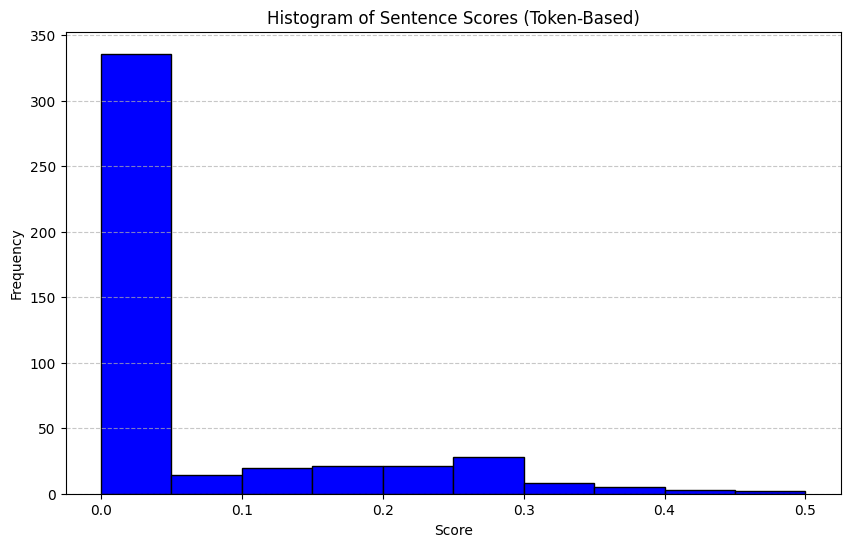

In [8]:
import matplotlib.pyplot as plt

# Create a list to store the scores for all sentences
sentence_scores = []

# Loop through each sentence in the article
for sentence in doc.sents:
    # Calculate the token score for the sentence
    score = score_sentence_by_token(sentence.text, frequent_tokens)
    # Append the score to the list
    sentence_scores.append(score)

# Plot a histogram of the scores
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=10, color='blue', edgecolor='black')
plt.title("Histogram of Sentence Scores (Token-Based)")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Comment: Based on the histogram, the most common range of scores appears to be in the range of 0.0–0.1.


7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

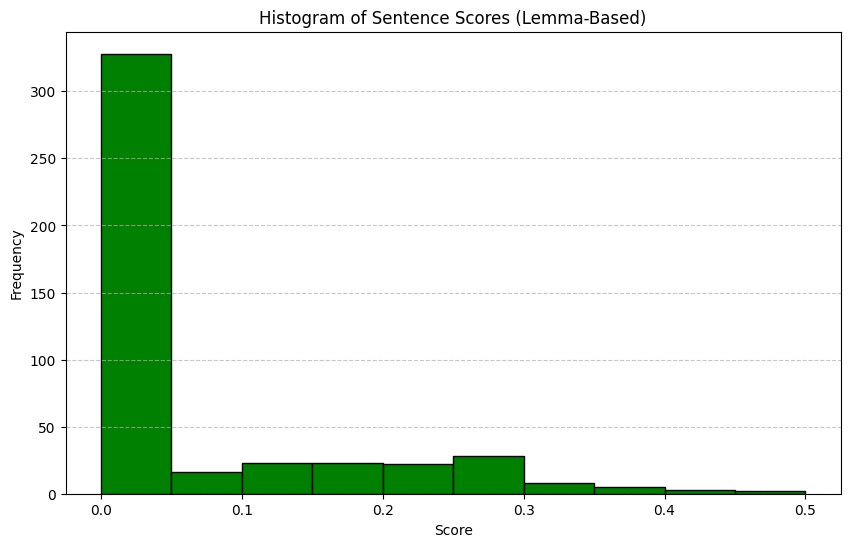

In [9]:
# Create a list to store the scores for all sentences using lemmas
lemma_scores = []

# Loop through each sentence in the article
for sentence in doc.sents:
    # Calculate the lemma score for the sentence
    score = score_sentence_by_lemma(sentence.text, frequent_lemmas)
    # Append the score to the list
    lemma_scores.append(score)

# Plot a histogram of the lemma scores
plt.figure(figsize=(10, 6))
plt.hist(lemma_scores, bins=10, color='green', edgecolor='black')
plt.title("Histogram of Sentence Scores (Lemma-Based)")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Comment: Based on the histogram, the most common range of scores appears to be in the range of 0.0–0.1.


8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

Question 3 (Update)
filtered_tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space and token.pos_ == "NOUN"]


Question 4 (Update)
filtered_lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space and token.pos_ == "NOUN"]
